In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
import json
import re


df1 = pd.read_csv('trump-tweets-raw(data-world).csv',encoding='Latin-1')
json_data = open("donald_data.json",'r')
df = pd.read_csv('Donald-Tweets!.csv',encoding='Latin-1')

In [176]:
def get_month(date):
    """
    Extract the month from the Date column and 
    then convert month from letter to digit.
    INPUT: date
    OUTPUT: month 
    """
    
    month = date.split()[1]
    
    for m, m_num in {'Jan': "01",
                     'Feb': "02",
                     'Mar': "03",
                     'Apr': "04",
                     'May': "05",
                     'Jun': "06",
                     'Jul': "07",
                     'Aug': "08",
                     'Sep': "09",
                     'Okt': "10",
                     'Nov': "11",
                     'Dec': "12"}.items():
        if month == m:
            return month.replace(m, m_num)            

def get_day(date):
    
    """
    Extract the day from the Date column 
    INPUT: date
    OUTPUT: day 
    """ 
    return date.split()[2]

def get_year(date):
    """
    Extract the month from the Date column 
    INPUT: date
    OUTPUT: year 
    """ 
    year = re.search("\S*$",date)
    return year.group(0)
    
def get_time(date):
    """
    Extract the time from the Date column 
    INPUT: date
    OUTPUT: time 
    """ 
    time = re.search("[0-9].:[0-9].:[0-9]*",date)
    return time.group(0)


twt_date = []
twt_text = []

for i in json_data:
    twt_date.append(json.loads(i)['created_at'])
    twt_text.append(json.loads(i)['full_text'])

df_json = pd.DataFrame({'Date': twt_date,
                   'Text': twt_text})

df_json['month'] = df_json.apply(lambda x: get_month(str(x['Date'])), axis=1)
df_json['day'] = df_json.apply(lambda x: get_day(str(x['Date'])), axis=1)
df_json['year'] = df_json.apply(lambda x: get_year(str(x['Date'])), axis=1)
df['time'] = df_json.apply(lambda x: get_time(str(x['Date'])), axis=1)
#df.drop(columns='Date')
df_json['Date'] = df_json['year']+'-'+df_json['month']+'-'+df_json['day']

df_update = df_json[['Date','Text']]
df_update.head()

,Date,Text
0,2018-09-11,The safety of American people is my absolute h...
1,2018-09-11,Small Business Optimism Soars to Highest Level...
2,2018-09-11,#NeverForget #September11th \nhttps://t.co/l8W...
3,2018-09-11,17 years since September 11th!
4,2018-09-11,"Departing Washington, D.C. to attend a Flight ..."


In [177]:
df.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11,time
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN,20:16:49
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN,16:48:49
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,NaN,NaN,15:32:28
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,NaN,NaN,12:58:10
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,NaN,NaN,12:24:52


In [178]:
df[df['Date']=='16-08-08']

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11,time
1140,16-08-08,23:18:42,"As Senator Clinton promised 200,000 jobs in Up...",text,photo,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,17785,7962,NaN,NaN,17:13:47
1141,16-08-08,22:45:33,Many people are saying that the Iranians kille...,text,NaN,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,34214,13469,NaN,NaN,14:04:24
1142,16-08-08,22:43:56,Thank you Newt! https://t.co/Acg0hMvrpr,text,NaN,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,25622,9019,NaN,NaN,13:37:34
1143,16-08-08,22:27:02,Thank you Congressman Steven Palazzo! https://...,text,photo,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,16813,6173,NaN,NaN,13:29:32
1144,16-08-08,22:24:09,Thank you Senator David Perdue!\nhttps://t.co/...,link,photo,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,15824,6197,NaN,NaN,13:19:34
1145,16-08-08,22:20:31,Thank you @RepLouBarletta!\nhttps://t.co/bre8u...,text,photo,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,13848,4721,NaN,NaN,13:11:05
1146,16-08-08,22:15:44,Thank you @NFIB- together we will #MakeAmerica...,text,NaN,MakeAmericaGreatAgain,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,13526,4574,NaN,NaN,13:04:21
1147,16-08-08,22:12:21,Thank you! https://t.co/4p0hzpkVWF,text,NaN,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,12272,3654,NaN,NaN,21:27:48
1148,16-08-08,22:06:25,Thank you Alex! https://t.co/c2uIa7mndP,text,NaN,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,13384,4291,NaN,NaN,18:37:39
1149,16-08-08,20:14:57,RT @NFIB: .@NFIB encouraged by @realDonaldTrum...,link,NaN,taxplan;smallbiz,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,8115,3356,NaN,NaN,18:00:43


In [179]:
df1.tail()

,id,source,text,created
2337,734938503541325825,Android,Much of the money I have raised for our vetera...,2016-05-24T02:46:08Z
2338,734936659851128832,Android,"While under no obligation to do so, I have rai...",2016-05-24T02:38:48Z
2339,734903156589645824,iPhone,Join me in California or Montana!\n5/25/16: An...,2016-05-24T00:25:41Z
2340,734892328637325312,Android,I will be interviewed on @oreillyfactor at 8:0...,2016-05-23T23:42:39Z
2341,734742416494845952,Android,"In trade, military and EVERYTHING else, it wil...",2016-05-23T13:46:57Z


In [180]:
#Create two new columns for date and time 
import re
df1['Date'] = df1['created'].str.replace(r'T(\d\d):(\d\d):(\d\d)Z','')
df1['Time'] = df1['created'].str.replace(r'(\d\d\d\d)-(\d\d)-(\d\d)T','').str.replace(r'Z','')

In [181]:
#Remove uncessary columns 
columns = ['Type','Media_Type','Hashtags','Tweet_Id','Tweet_Url','twt_favourites_IS_THIS_LIKE_QUESTION_MARK','Retweets','Unnamed: 10','Unnamed: 11']
df = df.drop(columns,axis=1)
df.tail()


,Date,Time,Tweet_Text,time
7370,15-07-16,13:10:00,I loved firing goofball atheist Penn @pennjill...,NaN
7371,15-07-16,10:18:31,I hear @pennjillette show on Broadway is terri...,NaN
7372,15-07-16,10:10:17,Irrelevant clown @KarlRove sweats and shakes n...,NaN
7373,15-07-16,9:44:07,"""@HoustonWelder: Donald Trump is one of the se...",NaN
7374,15-07-16,0:21:25,RT @marklevinshow: Trump: Rove is a clown and ...,NaN


In [182]:
columns = ['id','source','created']
df1 = df1.drop(columns,axis=1)
df1

,text,Date,Time
0,"The #AmazonWashingtonPost, sometimes referred ...",2017-06-28,13:06:14
1,Some of the Fake News Media likes to say that ...,2017-06-28,10:58:59
2,The failing @nytimes writes false story after ...,2017-06-28,10:49:22
3,I just finished a great meeting with the Repub...,2017-06-27,22:27:48
4,"With ZERO Democrats to help, and a failed, exp...",2017-06-27,22:22:55
...,...,...,...
2337,Much of the money I have raised for our vetera...,2016-05-24,02:46:08
2338,"While under no obligation to do so, I have rai...",2016-05-24,02:38:48
2339,Join me in California or Montana!\n5/25/16: An...,2016-05-24,00:25:41
2340,I will be interviewed on @oreillyfactor at 8:0...,2016-05-23,23:42:39


In [183]:
#Update the year with 4-digit
df['Date'] = df['Date'].str.replace(r'^()','20')
df.tail()

,Date,Time,Tweet_Text,time
7370,2015-07-16,13:10:00,I loved firing goofball atheist Penn @pennjill...,NaN
7371,2015-07-16,10:18:31,I hear @pennjillette show on Broadway is terri...,NaN
7372,2015-07-16,10:10:17,Irrelevant clown @KarlRove sweats and shakes n...,NaN
7373,2015-07-16,9:44:07,"""@HoustonWelder: Donald Trump is one of the se...",NaN
7374,2015-07-16,0:21:25,RT @marklevinshow: Trump: Rove is a clown and ...,NaN


In [184]:
#Rename & capatilize first letter of a column
df.rename(columns={'Tweet_Text':'Text'}, inplace=True)
df1.rename(columns={'text':'Text'}, inplace=True)

In [185]:
#Change column order 
#Change the time format from x:xx:xx to xx:xx:xx
#and merge the dataframe together 

df = df[['Text','Date','Time']]
df['Time'] = df['Time'].str.replace(r'^(\d):(\d\d):(\d\d)',r'0\1:\2:\3')


In [186]:
df.tail() #2016-11 2015-07
#df[df['Date'] == '2016-11-11']

,Text,Date,Time
7370,I loved firing goofball atheist Penn @pennjill...,2015-07-16,13:10:00
7371,I hear @pennjillette show on Broadway is terri...,2015-07-16,10:18:31
7372,Irrelevant clown @KarlRove sweats and shakes n...,2015-07-16,10:10:17
7373,"""@HoustonWelder: Donald Trump is one of the se...",2015-07-16,09:44:07
7374,RT @marklevinshow: Trump: Rove is a clown and ...,2015-07-16,00:21:25


In [187]:
df1.tail() #2017-06 2016-05
df1[df1['Date'] == '2016-11-11']

,Text,Date,Time
1791,Today we express our deepest gratitude to all ...,2016-11-11,15:26:37
1792,Busy day planned in New York. Will soon be mak...,2016-11-11,13:33:35
1793,Love the fact that the small groups of protest...,2016-11-11,11:14:20
1794,Just had a very open and successful presidenti...,2016-11-11,02:19:44
1795,A fantastic day in D.C. Met with President Oba...,2016-11-11,02:10:46


In [188]:
df_merged = pd.concat([df,df1, df_update])
#df_merged = merged.copy()#df1[df1['Date']=='2016-08-08'].copy()
df_merged = df_merged.reset_index()


In [189]:
# Plot the first five lines of text
for text in df_merged['Text'][:5]:
    print(text)

Today we express our deepest gratitude to all those who have served in our armed forces. #ThankAVet https://t.co/wPk7QWpK8Z
Busy day planned in New York. Will soon be making some very important decisions on the people who will be running our government!
Love the fact that the small groups of protesters last night have passion for our great country. We will all come together and be proud!
Just had a very open and successful presidential election. Now professional protesters, incited by the media, are protesting. Very unfair!
A fantastic day in D.C. Met with President Obama for first time. Really good meeting, great chemistry. Melania liked Mrs. O a lot!


In [191]:
def cleaning(x):
    
    
    x = re.sub(r"http.+",'', x) #remove URL
    x = re.sub(r"^RT.*$",'',x) # remove all retweets
    #x = re.sub(r"(\w)([A-Z])", r"\1 \2",x) #Space before capital letters
    #x = x.lower() # Convert upercase to lowercase
    x = re.sub(r"[&]\S*\s",'',x) # remove words starting with & like &amp
    x = re.sub(r"[^a-zA-Z]",' ', x) # Remove non-letters
    x = re.sub(r"\s+",' ', x) # replace several spaces with one space
    #x = x.strip()
    #x.replace("@\S*",'',regex=True,inplace=True)
    #x.replace("[\n]",'',regex=True,inplace=True)
    return x

df_merged['Text'] = df_merged.apply(lambda x: cleaning(str(x['Text'])),axis=1)
for text in df_merged['Text']:
    print(text)

Today we express our deepest gratitude to all those who have served in our armed forces ThankAVet 
Busy day planned in New York Will soon be making some very important decisions on the people who will be running our government 
Love the fact that the small groups of protesters last night have passion for our great country We will all come together and be proud 
Just had a very open and successful presidential election Now professional protesters incited by the media are protesting Very unfair 
A fantastic day in D C Met with President Obama for first time Really good meeting great chemistry Melania liked Mrs O a lot 
Happy st birthday to the U S Marine Corps Thank you for your service 
Such a beautiful and important evening The forgotten man and woman will never be forgotten again We will all come together as never before
Watching the returns at pm ElectionNight MAGA 



Still time to VoteTrump iVoted ElectionNight 
Dont let up keep getting out to vote this election is FAR FROM OVER We


TERRORISM IMMIGRATION AND NATIONAL SECURITY SPEECH TRANSCRIPT 
Congratulations to the StanleyCup Champions Pittsburgh Penguins 
I am watching FoxNews and how fairly they are treating me and my words and CNN and the total distortion of my words and what I am saying
I will be going to New Hampshire today home of my first primary victory to discuss terror and the horrible events of yesterday P M 
I have been hitting Obama and Crooked Hillary hard on not using the term Radical Islamic Terror Hillary just broke said she would now use 
What has happened in Orlando is just the beginning Our leadership is weak and ineffective I called it and asked for the ban Must be tough
 WandaWalls realDonaldTrump Please make us safe We cannot have Hillary as president We will be in so much trouble 
Reporting that Orlando killer shouted Allah hu Akbar as he slaughtered clubgoers nd man arrested in LA with rifles near Gay parade 
Is President Obama going to finally mention the words radical Islamic terroris


USSS did an excellent job stopping the maniac running to the stage He has ties to ISIS Should be in jail 
Do the people of Ohio know that John Kasich is STRONGLY in favor of Common Core In other words education of your children from D C No way
 EndCommonCore Trump Video 
Just finished my second speech K in Dayton K in Cleveland perfectly behaved crowd Thanks I love you Ohio 
It is Clinton and Sanders people who disrupted my rally in Chicago and then they say I must talk to my people Phony politicians 
The last person that Hillary or Bernie want to run against is Donald Trump and that is fact 
We are asking law enforcement to check for dishonest early voting in Florida on behalf of little Marco Rubio No way to run a country 
Word is early voting in FL is very dishonest Little Marco his State Chairman their minions are working overtime trying to rig the vote 
The rally in Cincinnati is ON Media put out false reports that it was cancelled MakeAmericaGreatAgain Trump 
Thank you Dayton Ohi

When will TedCruz give all the New York based campaign contributions back to the special interests that control him 
Everybody that loves the people of New York and all they have been thru should get hypocrites like Ted Cruz out of politics 
If Ted Cruz is so opposed to gay marriage why did he accept money from people who espouse gay marriage 
Ted is the ultimate hypocrite Says one thing for money does another for votes 
Great new numbers Thank you MakeAmericaGreatAgain Trump 
Ted Cruz purposely and illegally did not list on his personal disclosure form personally guaranteed loans from banks They own him 
Based on the fact that Ted Cruz was born in Canada and is therefore a natural born Canadian did he borrow unreported loans from C banks 
Oh no just reported that Ted Cruz didnt report another loan this one from Citi Wow no wonder banks do so well in the U S Senate 
The Ted Cruz wiseguy apology to the people of New York is a disgrace Remember his wifes employer and his lender is locate

Marco Rubio will not win Weak on illegal immigration strong on amnesty and has the appearance to killers of the world as a lightweight 
I told you in speeches months ago that Jeb and Marco do not like each other Marco is too ambitious and very disloyal to Jeb as his mentor 
Jebs new slogan Jeb can fix it I never thought of Jeb as a crook Stupid message the word fix is not a good one to use in politics 
Anybody that believes in strong borders and stopping illegal immigration cannot vote for Marco Rubio READ THIS 
Further proof that Gang of Eight member Marco Rubio is weak on illegal immigration is Paul Singers Mr Amnesty endorsement Rubs cant win
 BellicWolf and is w Anyway for me the most original costume was Donald Trump like President 
 Michael First Vote News Video Mike Tyson Endorses Donald Trump for President 
 N R Mandela realDonaldTrump And youre still a negative loser and Trump is still a positive winner Im Black and proudly voting TRUMP 
 PaulaPedene Trump Leads GOP Carson Sta

 TrumpDemocrats Carson on CNN now He is worse than Jeb like ambien for insomnia We need energy in the White House We need DonaldTrump
 JohnnnnyT realDonaldTrump blew it away on FallonTonight The ratings will be HUUUGE 
 pennybishop realDonaldTrump GinHay jimmyfallon Great show Trump you are Awesomeness God Bless MakeAmericaGreatAgain
 iamapatsfan What are your thoughts on your good friend Tom Bradys performance yesterday He was fantastic a total winner 
 SOS jrt d Mr Trump you werent just HUGE on FallonTonight you were AWESOME WISDOM and HUMOR ARE A POWERFUL COMBINATION 
 KittenHoliday At the neighborhood bar talking about realDonaldTrump we need him We will make America great again 
 lizaperri realDonaldTrump GinHay jimmyfallon You even made the show great again 
 unknown resist realDonaldTrump GinHay jimmyfallon Trump will be our leader and we will be thankful 
 davist If I was Id vote for realDonaldTrump Thank you 
 debra realDonaldTrump GinHay jimmyfallon absolutely hes just simply

Crooked H destroyed phones w hammer bleached emails had husband meet w AG days before she was cleared they talk about obstruction 
Why is that Hillary Clintons family and Dems dealings with Russia are not looked at but my non dealings are 
Great numbers on the economy All of our work including the passage of many bills regulation killing Executive Orders now kicking in 
My daughter Ivanka will be on foxandfriends tomorrow morning Enjoy 
The Democrats have no message not on economics not on taxes not on jobs not on failing Obamacare They are only OBSTRUCTIONISTS 
I believe the James Comey leaks will be far more prevalent than anyone ever thought possible Totally illegal Very cowardly 
 way up Regulations way down new jobs added Unemployment down to Business and economic enthusiasm way up record levels 
The FakeNews MSM doesn t report the great economic news since Election Day DOW up NASDAQ up Drilling energy sector 
Congratulations to Jeb Hensarling Republicans on successful House vote 

The Club For Growth which asked me for in an extortion attempt just put up a Wisconsin ad with incorrect math What a dumb group 
 MakeAmericaGreatAgain Trump 
THANK YOU NEW YORK Trump 
THANK YOU AMERICA Trump MakeAmericaGreatAgain 
THANK YOU WISCONSIN VoteTrump next Tuesday April th WIPrimary 
Just had a very nice meeting with Reince Priebus and the GOP Looking forward to bringing the Party together and it will happen 
The Trump Doctrine Peace Through Strength Trump 
 susanbirchfiel Nothing you say will change my mind Woman for realDonaldTrump 
 Gearssuxs loudobbsnews realDonaldTrump I m a democrat and switch over to republican just to vote for trump in the primary Great 
Thank you Appleton Wisconsin WIPrimary Trump 
Congratulations to CNN for having the wisdom to pick TRUMP MakeAmericaGreatAgain Trump 
Please keep your thoughts prayers with Melissa Young Miss Wisconsin 
THANK YOU NEW YORK MakeAmericaGreatAgain Trump 
 DavidGregory got thrown off of TV by NBC fired like a dog Now he is

 Ford has abruptly killed a plan to sell a Chinese made small vehicle in the U S because of the prospect of higher U S Tariffs CNBC This is just the beginning This car can now be BUILT IN THE U S A and Ford will pay no tariffs 
 Barack Obama talked a lot about hope but Donald Trump delivered the American Dream All the economic indicators what s happening overseas Donald Trump has proven to be far more successful than Barack Obama President Trump is delivering the American Dream Jason Chaffetz
Happy Anniversary ProudDeplorable 
So nice thank you both 
The Dems have tried every trick in the playbook call me everything under the sun But if I m all of those terrible things how come I beat them so badly Maybe they re just not very good The fact is they are going CRAZY only because they know they can t beat me in 
Republicans are doing really well with the Senate Midterms Races that we were not even thinking about winning are now very close or even leading Election night will be very interes

Kim Strassel of the WSJ just said after reviewing the dumb Comey Memos you got to ask what was the purpose of the Special Counsel There s no there there Dan Henninger of the WSJ said Memos would show that this would be one of the weakest obstruction cases ever brought 
Funny how all of the Pundits that couldn t come close to making a deal on North Korea are now all over the place telling me how to make a deal 
A complete Witch Hunt 
 I can die happy now with Trump Job performance stated Mary Matalin A great overall President stunning Thank you Mary 
 We are a long way from conclusion on North Korea maybe things will work out and maybe they won t only time will tell But the work I am doing now should have been done a long time ago 
Sleepy Eyes Chuck Todd of Fake News NBC just stated that we have given up so much in our negotiations with North Korea and they have given up nothing Wow we haven t given up anything they have agreed to denuclearization so great for World site closure no more

The Fake News is going crazy with wacky Congresswoman Wilson D who was SECRETLY on a very personal call and gave a total lie on content 
Keep up the GREAT work I am with you ISIS is losing its grip Army Colonel Ryan Dillon CJTF OIR 
It was great to have Governor RicardoRossello of PuertoRico with us at the WhiteHouse today We are with you PRStrong 
 foxandfriends Russia sent millions to Clinton Foundation 
Workers of firm involved with the discredited and Fake Dossier take the th Who paid for it Russia the FBI or the Dems or all 
Uranium deal to Russia with Clinton help and Obama Administration knowledge is the biggest story that Fake Media doesn t want to follow 
Republicans are going for the big Budget approval today first step toward massive tax cuts I think we have the votes but who knows 
 of Americans think the Media is inventing stories about Trump his Administration FoxNews It is actually much worse than this 
 DanaPerino BradThor Thank you so much for the wonderful compliment 

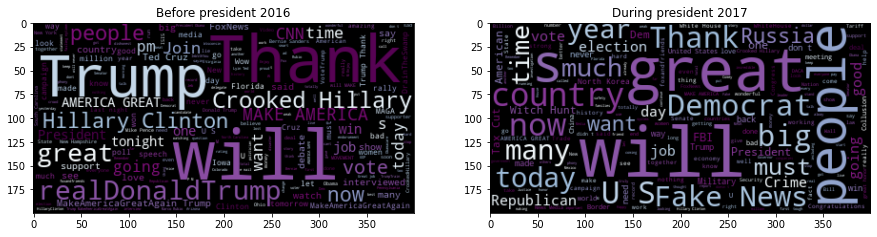

In [65]:
text2016 = df_merged[(df_merged['Date'] >='2016-01-01') & (df_merged['Date'] <='2016-12-31')]['Text']
lst_text2016 = []
lst_text2016.append(' '.join(text for text in text2016))

text2017 = df_merged[(df_merged['Date'] >='2017-01-01') & (df_merged['Date'] <='2018-12-31')]['Text']
lst_text2017 = []
lst_text2017.append(' '.join(text for text in text2017))

fig, axes = plt.subplots(1,2,squeeze=False,figsize=(15,15))

wordcloud2016 = WordCloud(max_words=200, background_color="black",
                          colormap='BuPu',random_state=72).generate(lst_text2016[0])

wordcloud2017 = WordCloud(max_words=200, background_color="black",
                          colormap='BuPu',random_state=72).generate(lst_text2017[0])
axes[0][0].imshow(wordcloud2016, interpolation='bilinear')
axes[0][1].imshow(wordcloud2017, interpolation='bilinear')
axes[0][0].title.set_text('Before president 2016')
axes[0][1].title.set_text('During president 2017')
#axes[0][0].axis("off")
#axes[0][0].title('2016 before president')
plt.show()


In [192]:
t = ''.join(df_merged['Text'])
t

'Today we express our deepest gratitude to all those who have served in our armed forces ThankAVet Busy day planned in New York Will soon be making some very important decisions on the people who will be running our government Love the fact that the small groups of protesters last night have passion for our great country We will all come together and be proud Just had a very open and successful presidential election Now professional protesters incited by the media are protesting Very unfair A fantastic day in D C Met with President Obama for first time Really good meeting great chemistry Melania liked Mrs O a lot Happy st birthday to the U S Marine Corps Thank you for your service Such a beautiful and important evening The forgotten man and woman will never be forgotten again We will all come together as never beforeWatching the returns at pm ElectionNight MAGA Still time to VoteTrump iVoted ElectionNight Dont let up keep getting out to vote this election is FAR FROM OVER We are doing 

In [193]:
cv = CountVectorizer(stop_words=STOPWORDS, min_df=0.8)
text_cv = cv.fit_transform([t])

text_cv.toarray()
#for i in cv.vocabulary_:
#    print(i)
dff=pd.DataFrame(text_cv.toarray(), columns=cv.get_feature_names()).transpose().sort_values(by=0,ascending=False)#.filter(like='make',axis=0)
dff



C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,0
will,2430
trump,2407
great,2075
realdonaldtrump,1468
thank,1380
...,...
pjs,1
pjnet,1
pjdahling,1
pjaliveguy,1


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
      'This is the first document.',
      'This document is the second document.',
      'And this is the third one.',
      'Is this the first document?'
 ]
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X.toarray())
pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())

In [ ]:
for text in df_merged['Text']:
    print(text)

In [ ]:
text2016 = df_merged[(df_merged['Date'] >='2016-01-01') & (df_merged['Date'] >='2016-12-31')]['Text']
lst_text2016 = []
lst_text2016.append(' '.join(text for text in text2016))

text2017 = df_merged[(df_merged['Date'] >='2017-01-01') & (df_merged['Date'] >='2017-06-15')]['Text']
lst_text2017 = []
lst_text2017.append(' '.join(text for text in text2017))

fig, axes = plt.subplots(1,2,squeeze=False,figsize=(15,15))

wordcloud2016 = WordCloud(max_words=200, background_color="black",
                          colormap='BuPu').generate(lst_text2016[0])

wordcloud2017 = WordCloud(max_words=200, background_color="black",
                          colormap='BuPu').generate(lst_text2016[0])
axes[0][0].imshow(wordcloud2016, interpolation='bilinear')
axes[0][1].imshow(wordcloud2017, interpolation='bilinear')
axes[0][0].title.set_text('Before president 2016')
axes[0][1].title.set_text('During president 2017')
#axes[0][0].axis("off")
#axes[0][0].title('2016 before president')
plt.show()


In [ ]:
from sklearn.feature_extraction import text 
#for i in df['Text']:
#    print(i)
text.ENGLISH_STOP_WORDS.union(df['Text'][5])


In [ ]:
pol = []
sub = []
for i, text in enumerate(test['Text']):
    pol.append(TextBlob(text).sentiment[0])
    sub.append(TextBlob(text).sentiment[1])


In [ ]:
df_sentiment = pd.DataFrame({'polarity':pol,
                         'subjectivity':sub})

# Concatenate the two dataframes into one
df = pd.concat([test,df_sentiment], axis=1)
df.sort_values(by='Date',inplace=True)
df.head()

In [ ]:
text2017 = df[(df['Date'] >='2017-01-01') & (df['Date'] >='2017-06-15')]['Text']
lst_text = []
lst_text.append(' '.join(text for text in text2017))

wordcloud = WordCloud(max_words=100, background_color="black",colormap='BuPu').generate(lst_text[0])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('2017 during president')
plt.show()


In [ ]:
df['date'] = df['Date']+' '+df['Time']
df['date'] = pd.to_datetime(df['date'])
df.info()

In [ ]:
df.drop(columns=['index'],inplace=True)

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
sentiment_week = df.groupby(pd.Grouper(key='date',freq='w')).mean()
sentiment_day = df.groupby(pd.Grouper(key='date',freq='d')).mean()

sentiment_day.plot(alpha=0.7, ax=ax1,figsize=(12,4))
sentiment_week.plot(alpha=0.7, ax=ax2)

In [ ]:
test = df1[df1['Date']=='2016-08-08'].copy()
for i in test['Text']:
    print(i)

#re.sub(r"(?<=\s(http.)).*?(?=\s)",'',test['Text'])
#test['Text'].replace("http.+",'',regex=True,inplace=True)
#test['Text'].replace("@\S*",'',regex=True,inplace=True)
#test['Text'].replace("[\n]",'',regex=True,inplace=True)
#test['Text']

In [ ]:
test['Text'][2235]

In [ ]:
df[df['Date']=='16-08-08']

In [ ]:
df1s = df1.sort_values(by=['Date','Time'])

In [ ]:
df1s[df1s['Date']=='2016-08-08']

In [ ]:
df[df['Date']<='16-05-22'] #2016-11 2015-07